In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


In [4]:
df = pd.read_csv(r'C:\Users\SUMAIYA FATIMA\Desktop\BOOKS\goodreads_data.csv') 

In [5]:
df

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...


In [6]:
# List columns to drop based on your dataset load and EDA
columns_to_drop = ['Book', 'URL', 'Unnamed: 0']  # Add or remove column names as needed

# Drop the columns safely if they exist
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)


In [7]:
df.head(5)

,Author,Description,Genres,Avg_Rating,Num_Ratings
0,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311"
1,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135"
2,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155"
3,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438"
4,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172"


In [8]:
# --------- Exploratory Data Analysis (EDA) ----------
print("Data sample:")
print(df.head())


Data sample:
          Author                                        Description  \
0     Harper Lee  The unforgettable novel of a childhood in a sl...   
1   J.K. Rowling  Harry Potter thinks he is an ordinary boy - un...   
2    Jane Austen  Since its immediate success in 1813, Pride and...   
3     Anne Frank  Discovered in the attic in which she spent the...   
4  George Orwell  Librarian's note: There is an Alternate Cover ...   

                                              Genres  Avg_Rating Num_Ratings  
0  ['Classics', 'Fiction', 'Historical Fiction', ...        4.27   5,691,311  
1  ['Fantasy', 'Fiction', 'Young Adult', 'Magic',...        4.47   9,278,135  
2  ['Classics', 'Fiction', 'Romance', 'Historical...        4.28   3,944,155  
3  ['Classics', 'Nonfiction', 'History', 'Biograp...        4.18   3,488,438  
4  ['Classics', 'Fiction', 'Dystopia', 'Fantasy',...        3.98   3,575,172  


In [9]:
print("\nData info:")
print(df.info())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Author       10000 non-null  object 
 1   Description  9923 non-null   object 
 2   Genres       10000 non-null  object 
 3   Avg_Rating   10000 non-null  float64
 4   Num_Ratings  10000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 390.8+ KB
None


In [10]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
         Avg_Rating
count  10000.000000
mean       4.068577
std        0.335359
min        0.000000
25%        3.880000
50%        4.080000
75%        4.260000
max        5.000000


In [11]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
dtype: int64


In [12]:
df.fillna({'Description': '', 'Genres': '[]'}, inplace=True)

In [13]:
df.isnull().sum()

Author         0
Description    0
Genres         0
Avg_Rating     0
Num_Ratings    0
dtype: int64

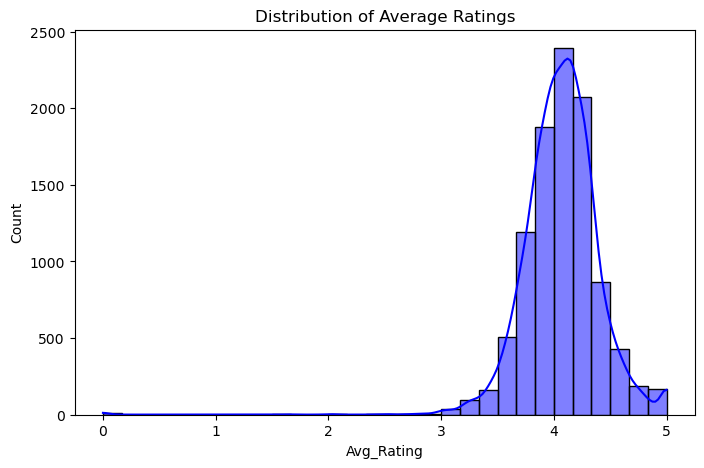

In [14]:
# Distribution of Avg_Rating
plt.figure(figsize=(8, 5))
sns.histplot(df['Avg_Rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Ratings')
plt.xlabel('Avg_Rating')
plt.ylabel('Count')
plt.show()

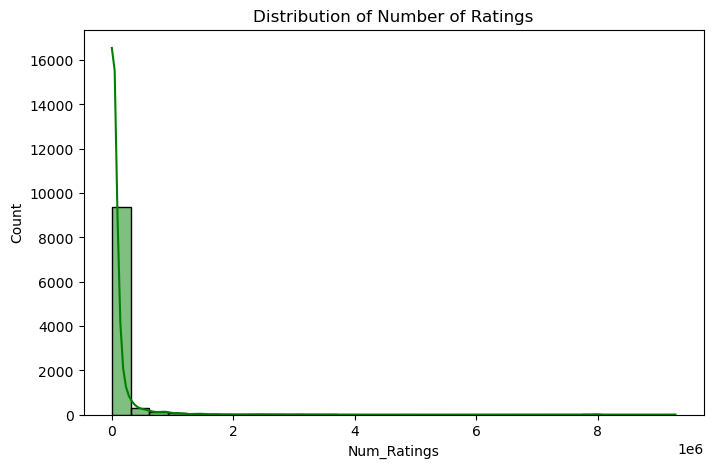

In [15]:
# Distribution of Num_Ratings (after cleaning commas)
df['Num_Ratings'] = df['Num_Ratings'].str.replace(',', '').astype(float)
plt.figure(figsize=(8,5))
sns.histplot(df['Num_Ratings'], bins=30, kde=True, color='green')
plt.title('Distribution of Number of Ratings')
plt.xlabel('Num_Ratings')
plt.ylabel('Count')
plt.show()

In [16]:
# Avg_Rating per genre (top 10 genres by frequency)
df['Genres'] = df['Genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)
all_genres = sum(df['Genres'].tolist(), [])
top_genres = pd.Series(all_genres).value_counts().head(10).index.tolist()

genre_avg_rating = {}
for genre in top_genres:
    avg = df[df['Genres'].apply(lambda x: genre in x)]['Avg_Rating'].mean()
    genre_avg_rating[genre] = avg

genre_rating_df = pd.DataFrame.from_dict(genre_avg_rating, orient='index', columns=['Avg_Rating']).sort_values(by='Avg_Rating')

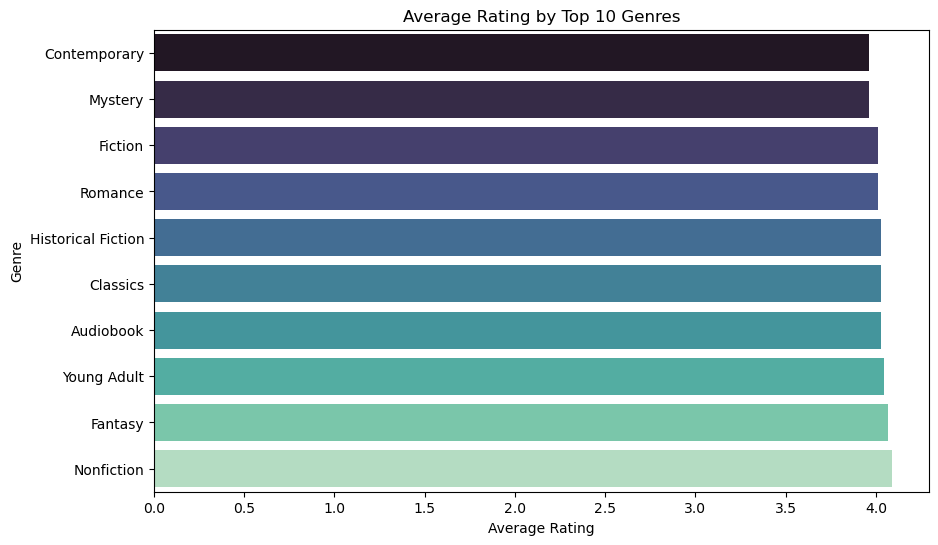

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_rating_df['Avg_Rating'], y=genre_rating_df.index, palette="mako")
plt.title('Average Rating by Top 10 Genres')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

In [18]:

# Multi-label Binarization for Genres
mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(df['Genres']), columns=mlb.classes_, index=df.index)
df = pd.concat([df, genre_dummies], axis=1)
df.drop('Genres', axis=1, inplace=True)

In [19]:
# Text Feature Extraction from Description
tfidf = TfidfVectorizer(max_features=500)
description_tfidf = tfidf.fit_transform(df['Description'])
description_df = pd.DataFrame(description_tfidf.toarray(), columns=tfidf.get_feature_names_out())
df = pd.concat([df.reset_index(drop=True), description_df.reset_index(drop=True)], axis=1)
df.drop('Description', axis=1, inplace=True)

In [20]:
# Encode Author
le_author = LabelEncoder()
df['Author_enc'] = le_author.fit_transform(df['Author'].astype(str))
df.drop('Author', axis=1, inplace=True)

In [21]:

# Features and target
X = df.drop('Avg_Rating', axis=1)
y = df['Avg_Rating']

In [22]:
X

,Num_Ratings,12th Century,15th Century,16th Century,17th Century,18th Century,19th Century,20th Century,21st Century,Abuse,...,written,wrong,year,years,yet,york,you,young,your,Author_enc
0,5691311.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.103349,0.000000,2113
1,9278135.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2350
2,3944155.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2494
3,3488438.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.087728,0.152653,0.0,0.0,0.000000,0.082533,0.000000,409
4,3575172.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,276.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.294439,0.000000,0.000000,512
9996,60.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.074204,1579
9997,383.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5056
9998,263.0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,4694


In [23]:
y

0       4.27
1       4.47
2       4.28
3       4.18
4       3.98
        ... 
9995    3.44
9996    4.23
9997    3.29
9998    4.13
9999    5.00
Name: Avg_Rating, Length: 10000, dtype: float64

In [24]:

# Feature scaling (important for SVR and KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [26]:
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=0.3, random_state=42)


In [27]:
# Define models with manual parameters for quick training example
models_manual = {
    'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'SVR': SVR(kernel='rbf', C=1, gamma='scale'),
    'KNN': KNeighborsRegressor(n_neighbors=5, weights='uniform'),
    'LinearRegression': LinearRegression()
}

In [28]:
# Training and evaluation function
def train_eval_manual(name, model, tune_on_subset=False):
    print(f"\nTraining {name}...")
    if tune_on_subset:
        model.fit(X_train_sub, y_train_sub)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Test RMSE for {name}: {test_rmse}")
    return model, test_rmse

In [29]:

trained_models_manual = {}
test_rmse_manual = {}

In [30]:
for name, model in models_manual.items():
    tune_subset = (name == 'RandomForest')  # Train RandomForest on subset, others on full set
    model_trained, rmse = train_eval_manual(name, model, tune_on_subset=tune_subset)
    trained_models_manual[name] = model_trained
    test_rmse_manual[name] = rmse


Training RandomForest...
Test RMSE for RandomForest: 0.29435168847483023

Training SVR...
Test RMSE for SVR: 0.28655655268098157

Training KNN...


  File "c:\Users\SUMAIYA FATIMA\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\SUMAIYA FATIMA\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\SUMAIYA FATIMA\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\SUMA

Test RMSE for KNN: 0.3670481902965876

Training LinearRegression...
Test RMSE for LinearRegression: 0.2956471532915254


In [31]:
print("\nModel Performance Summary (Test RMSE):")
for name, rmse in test_rmse_manual.items():
    print(f"{name}: RMSE = {rmse}")


Model Performance Summary (Test RMSE):
RandomForest: RMSE = 0.29435168847483023
SVR: RMSE = 0.28655655268098157
KNN: RMSE = 0.3670481902965876
LinearRegression: RMSE = 0.2956471532915254


In [35]:
# Save the best model
import pickle

best_model_name = min(test_rmse_manual, key=test_rmse_manual.get)
best_model = trained_models_manual[best_model_name]
filename = f'best_model_{best_model_name}.pkl'

with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model saved to {filename}")

Best model saved to best_model_SVR.pkl


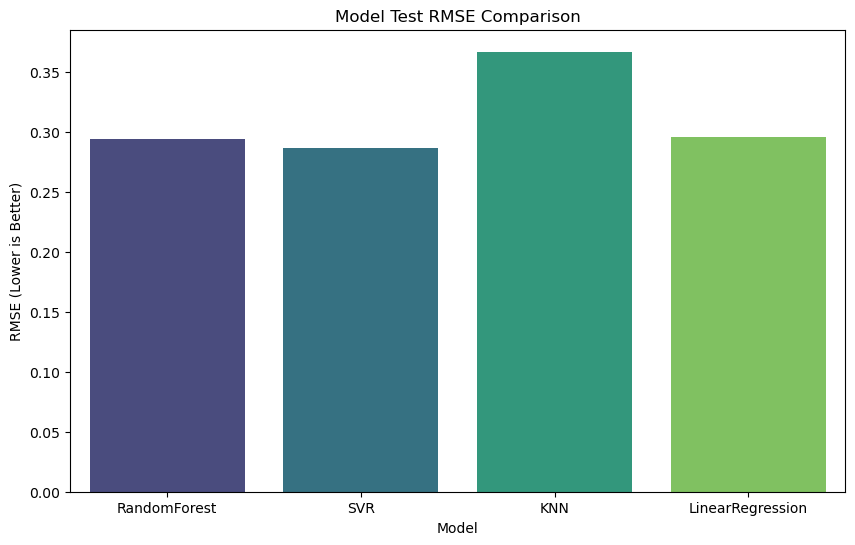

In [34]:
# OPTIONAL: Plot RMSE comparison bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=list(test_rmse_manual.keys()), y=list(test_rmse_manual.values()), palette="viridis")
plt.title('Model Test RMSE Comparison')
plt.ylabel('RMSE (Lower is Better)')
plt.xlabel('Model')
plt.show()

In [36]:
import pickle

# Directly refer to the KNN model from your trained models dictionary
best_model = trained_models_manual['KNN']
filename = 'best_model_knn.pkl'

with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"KNN model saved to {filename}")


KNN model saved to best_model_knn.pkl
